In [41]:
import pandas as pd
import numpy as np

dataset_subway = pd.read_excel('2019~2022년  일별 지하철 데이터.xlsx')

dataset_subway['날짜1'] = dataset_subway['날짜']
dataset_subway.tail()

,날짜,서울시 일일 확진자,서울시 누적확진자,평일/주말,평균 총운행횟수,승하차 합계,오전(0~12시),오후(12~18시),야간(18~24시),1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,날짜1
1242,2022-05-27,3026,3607946,평일,4721,9826006,3524462,3086318,3215226,507077,3129099,1186388,1089448,1426279,743733,1323011,420971,2022-05-27
1243,2022-05-28,2275,3610221,주말,3792,7068274,1921494,3149058,1997722,404726,2213994,891290,835559,978358,570437,888954,284956,2022-05-28
1244,2022-05-29,2018,3612239,주말,3792,4905865,1255310,2219629,1430926,275313,1526496,602892,580881,686045,396254,626390,211594,2022-05-29
1245,2022-05-30,1120,3613359,평일,4721,8917695,3528617,2612252,2776826,450943,2769566,1065238,996309,1323568,671368,1251891,388812,2022-05-30
1246,2022-05-31,3340,3616699,평일,4721,9550266,3594418,2812194,3143654,490204,3005577,1129439,1073926,1403401,721155,1313667,412897,2022-05-31


In [43]:
for i in range(1247):
    dataset_subway.iloc[i,0] = i
dataset_subway.head()

,날짜,서울시 일일 확진자,서울시 누적확진자,평일/주말,평균 총운행횟수,승하차 합계,오전(0~12시),오후(12~18시),야간(18~24시),1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,날짜1
0,0,0,0,주말,3792,4312350,1028564,1909121,1374665,293333,1363344,486466,563333,505501,330814,595201,174358,2019-01-01
1,1,0,0,평일,4721,10134974,3714192,2979487,3441295,563580,3271120,1171735,1180942,1305697,716537,1520343,405020,2019-01-02
2,2,0,0,평일,4721,10508422,3816191,3123247,3568984,588582,3407757,1220595,1228270,1343468,747507,1557680,414563,2019-01-03
3,3,0,0,평일,4721,10981933,3853996,3301413,3826524,629586,3581310,1288783,1278196,1381645,779589,1604079,438745,2019-01-04
4,4,0,0,주말,3792,7839964,1986100,3571699,2282165,505051,2557567,939900,980499,909676,564989,1084646,297636,2019-01-05


### 데이터를 쉽게 알아보기 위해 평일 데이터만 분석

In [44]:
dataset_subway = dataset_subway[dataset_subway['평일/주말'] == '평일']

### 코로나 확진 나올 때 시점으로 전/후 나누기

In [45]:
dataset_subway_post = dataset_subway[dataset_subway['서울시 일일 확진자'] > 0]

dataset_subway_post.head() # 2020년 2월 5일부터 코로나 발생

dataset_subway_prior = dataset_subway[(dataset_subway['서울시 일일 확진자'] == 0) & (dataset_subway['날짜']<400)]

dataset_subway_prior.tail()

,날짜,서울시 일일 확진자,서울시 누적확진자,평일/주말,평균 총운행횟수,승하차 합계,오전(0~12시),오후(12~18시),야간(18~24시),1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,날짜1
393,393,0,0,평일,4721,9941561,3699039,2895309,3347213,538184,3171372,1151874,1139691,1314368,713017,1501828,411227,2020-01-29
394,394,0,0,평일,4721,9973386,3715641,2912928,3344817,538295,3192627,1158804,1139181,1319413,719634,1498925,406507,2020-01-30
395,395,0,0,평일,4721,10096374,3694504,2953143,3448727,544389,3244093,1190908,1145248,1320775,730525,1507499,412937,2020-01-31
398,398,0,0,평일,4721,9327580,3630098,2593738,3103744,489511,2988242,1076116,1049930,1249093,671351,1416575,386762,2020-02-03
399,399,0,0,평일,4721,9459334,3621907,2649697,3187730,493657,3033110,1092760,1067234,1267763,684511,1428455,391844,2020-02-04


### 코로나 생기기 전 시점 승하차 합계

Text(0, 0.5, 'total subway user')

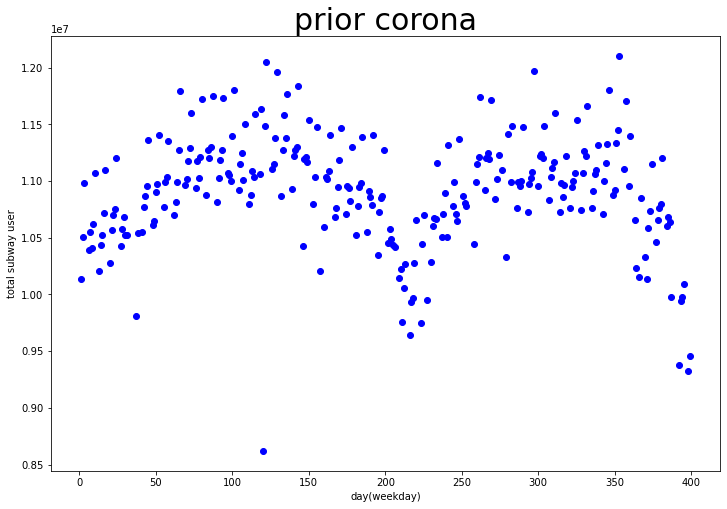

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_prior = dataset_subway_prior.iloc[:,0].values
y_prior = dataset_subway_prior.iloc[:,5].values

plt.figure(figsize=(12,8))
plt.scatter(X_prior, y_prior, color='blue')
plt.title('prior corona', size=30)
plt.xlabel('day(weekday)')
plt.ylabel('total subway user')

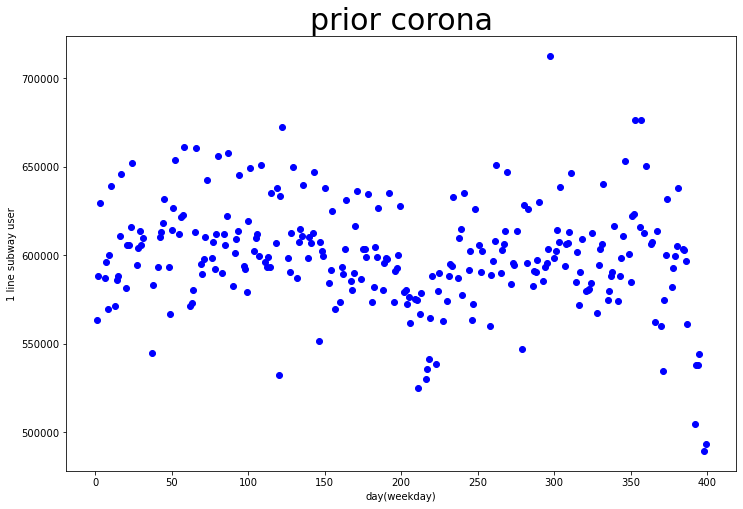

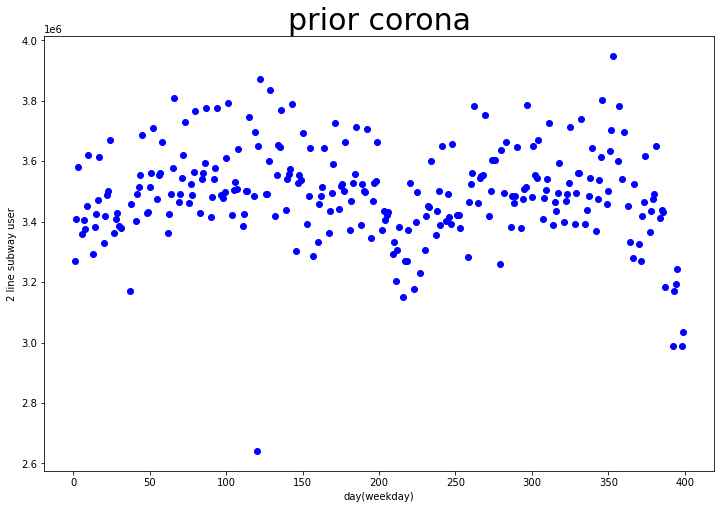

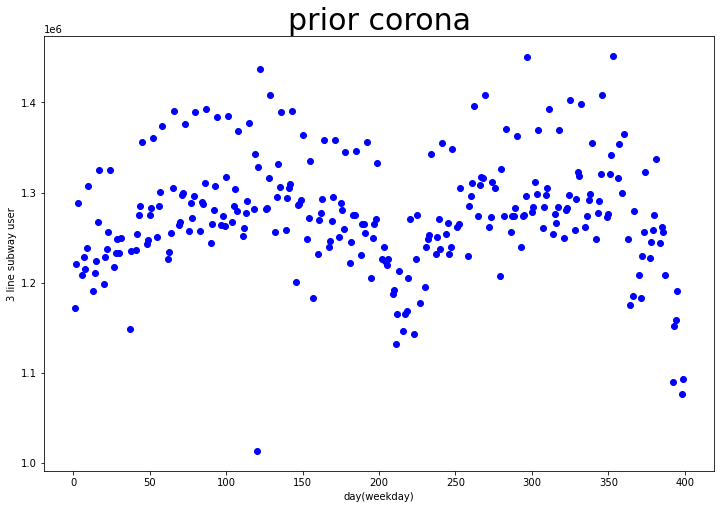

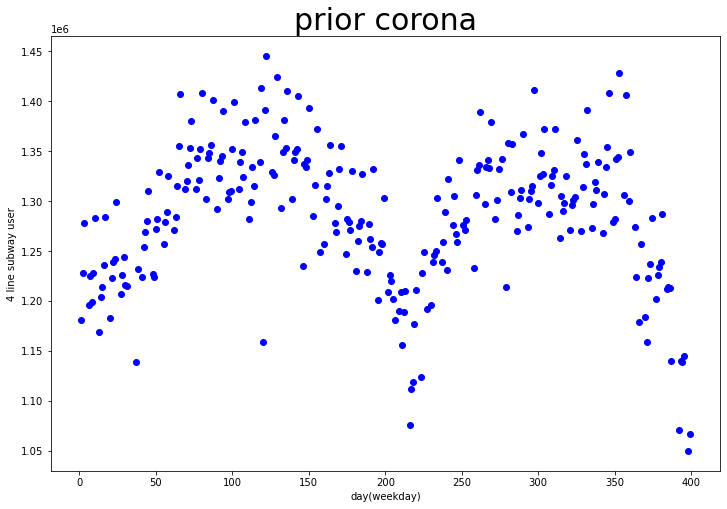

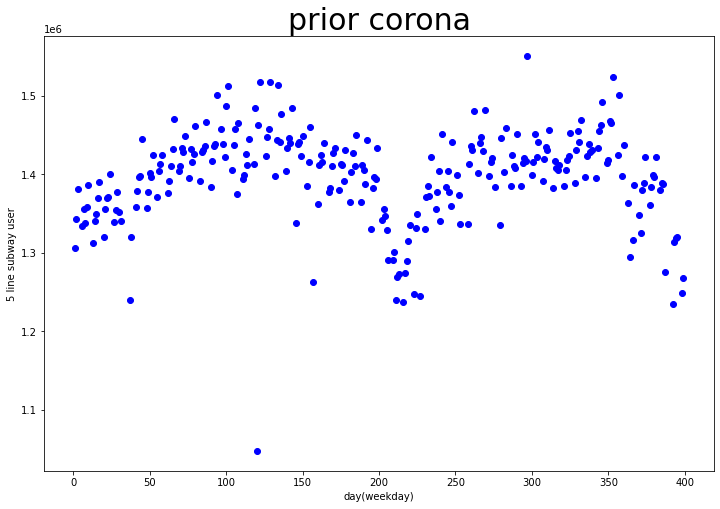

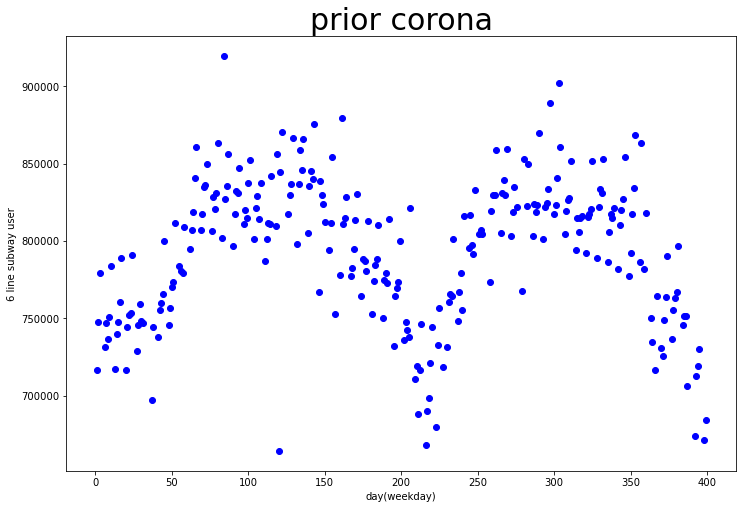

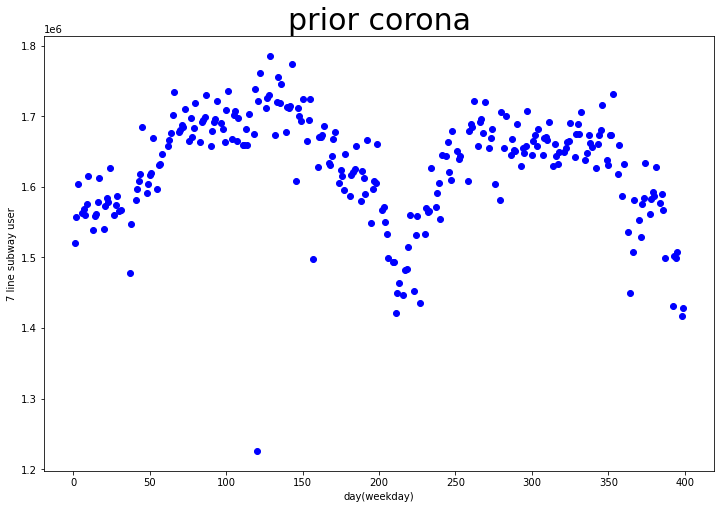

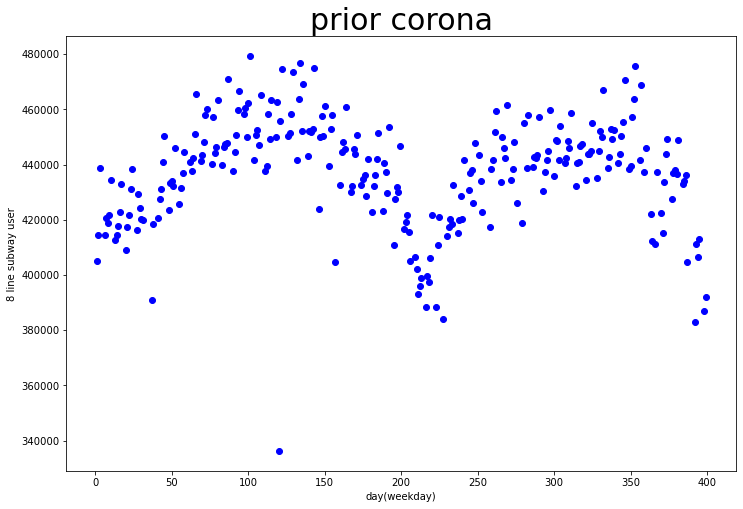

In [47]:
for i in range(8):
    X_prior = dataset_subway_prior.iloc[:,0].values
    y_prior = dataset_subway_prior.iloc[:,i+9].values

    plt.figure(figsize=(12,8))
    plt.scatter(X_prior, y_prior, color='blue')
    plt.title('prior corona', size=30)
    plt.xlabel('day(weekday)')
    plt.ylabel('{} line subway user'.format(i+1))

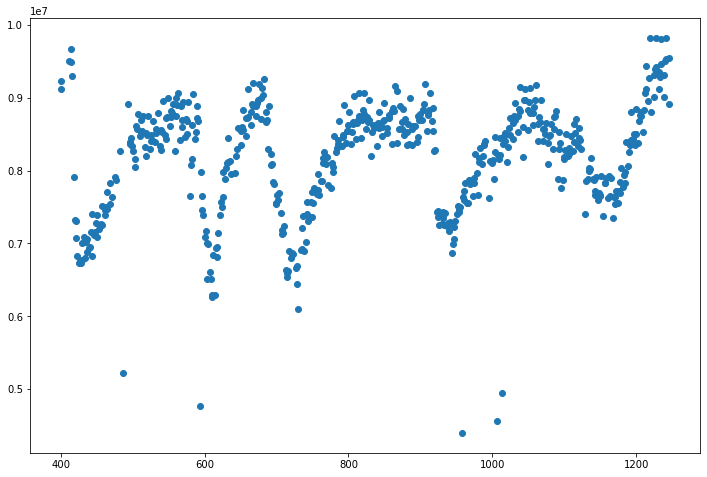

In [48]:
X_post = dataset_subway_post.iloc[:,0].values
y_post = dataset_subway_post.iloc[:,5].values

plt.figure(figsize=(12,8))
plt.scatter(X_post, y_post)

## 서울시 코로나 처음 급등 시(2020-8-17) 확진자 수 그래프와 지하철 승합차 비교

In [49]:
dataset_first_surge = dataset_subway[(dataset_subway['날짜'] >570) & (dataset_subway['날짜']<670)]
dataset_subway[(dataset_subway['날짜'] >570) & (dataset_subway['날짜']<670)]

,날짜,서울시 일일 확진자,서울시 누적확진자,평일/주말,평균 총운행횟수,승하차 합계,오전(0~12시),오후(12~18시),야간(18~24시),1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,날짜1
573,573,9,1574,평일,4721,8459008,3319171,2397873,2741964,435835,2675689,979031,935932,1148558,613144,1318234,352585,2020-07-27
574,574,6,1580,평일,4721,8712408,3344101,2521255,2847052,453978,2760280,1011124,974093,1178667,631853,1344122,358291,2020-07-28
575,575,9,1589,평일,4721,8503525,3244155,2428882,2830488,428504,2711821,989386,942375,1152315,615577,1306065,357482,2020-07-29
576,576,3,1592,평일,4721,8680025,3256871,2526604,2896550,455841,2764381,1008352,974128,1169151,624646,1325566,357960,2020-07-30
577,577,8,1600,평일,4721,8937895,3226566,2720019,2991310,475498,2854087,1062366,1005746,1184674,643561,1347999,363964,2020-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,664,20,5827,평일,4721,8631733,3387594,2497174,2746965,441755,2672308,998717,951490,1202865,625469,1371438,367691,2020-10-26
665,665,24,5851,평일,4721,8813411,3423582,2553233,2836596,452196,2745715,1020110,968583,1226957,639618,1384656,375576,2020-10-27
666,666,25,5876,평일,4721,8912607,3408110,2605720,2898777,456109,2783775,1027530,985282,1237620,649614,1394429,378248,2020-10-28
667,667,36,5912,평일,4721,8882525,3395319,2592700,2894506,457189,2771778,1029145,980820,1230508,645562,1383336,384187,2020-10-29


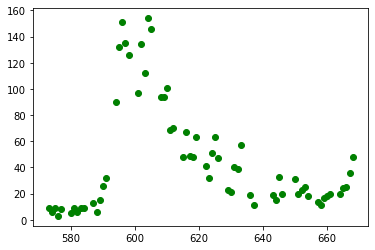

In [50]:
plt.scatter(dataset_first_surge['날짜'].values,dataset_first_surge['서울시 일일 확진자'].values, color='green')

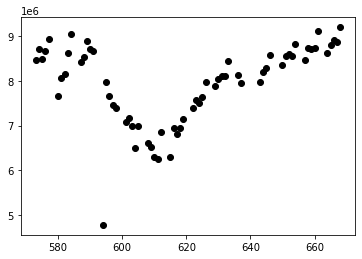

In [51]:
plt.scatter(dataset_first_surge['날짜'].values, dataset_first_surge['승하차 합계'].values, color='black')

## 처음 급등 이후 다음 급등 전까지 그래프

In [52]:
dataset_first_post = dataset_subway[(dataset_subway['날짜'] >610) & (dataset_subway['날짜']<710)]
dataset_subway[(dataset_subway['날짜'] >610) & (dataset_subway['날짜']<710)]

,날짜,서울시 일일 확진자,서울시 누적확진자,평일/주말,평균 총운행횟수,승하차 합계,오전(0~12시),오후(12~18시),야간(18~24시),1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,날짜1
611,611,69,4131,평일,4721,6260637,2513375,1721384,2025878,307825,1919090,700266,686862,882668,463701,1024958,275267,2020-09-03
612,612,70,4201,평일,4721,6847675,2658063,2001393,2188219,346459,2081833,785860,756922,954384,505503,1115203,301511,2020-09-04
615,615,48,4362,평일,4721,6291699,2622031,1656657,2013011,295439,1938059,709806,685480,884799,462114,1036561,279441,2020-09-07
616,616,67,4429,평일,4721,6934569,2764174,1974045,2196350,352570,2120119,785790,768204,967491,511335,1128570,300490,2020-09-08
617,617,49,4478,평일,4721,6815201,2752177,1925208,2137816,340007,2091343,770179,752057,949632,500906,1112381,298696,2020-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,703,295,9716,평일,4721,7698338,2919261,2349290,2429787,382297,2368296,898384,842596,1074627,558389,1236938,336811,2020-12-04
706,706,244,10449,평일,4721,7421293,3003078,2152368,2265847,364944,2276076,846848,807281,1051642,537373,1210243,326886,2020-12-07
707,707,214,10663,평일,4721,7182444,2911427,2068568,2202449,346025,2199252,822501,783746,1019257,524380,1170902,316381,2020-12-08
708,708,269,10932,평일,4721,7133362,2869245,2083339,2180778,345479,2172079,813177,779873,1015227,523443,1164788,319296,2020-12-09


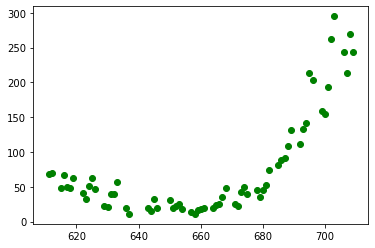

In [53]:
plt.scatter(dataset_first_post['날짜'].values,dataset_first_post['서울시 일일 확진자'].values, color='green')

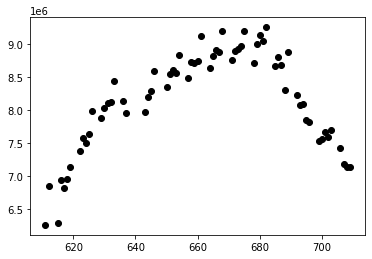

In [54]:
plt.scatter(dataset_first_post['날짜'].values, dataset_first_post['승하차 합계'].values, color='black')

## 코로나 일일 확진자 수 당 지하철 승합객 수 비교

Text(0, 0.5, 'subway daily user')

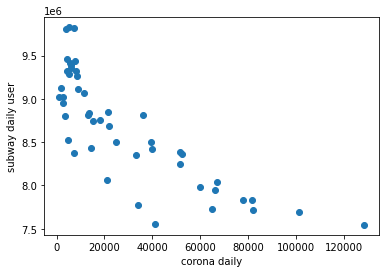

In [59]:
X_2 = dataset_subway[(dataset_subway['날짜'] > 1170) & (dataset_subway['날짜'] < 1240)]['서울시 일일 확진자']
y_2 = dataset_subway[(dataset_subway['날짜'] > 1170) & (dataset_subway['날짜'] < 1240)]['승하차 합계']
# 대강 2022년 

plt.scatter(X_2, y_2)
plt.xlabel('corona daily')
plt.ylabel('subway daily user')